In [1]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


### Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

### Dataset

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Description

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type

- Value 0: typical angina

- Value 1: atypical angina

- Value 2: non-anginal pain

- Value 3: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol: cholesterol in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl)

- 1 = true

- 0 = false

rest_ecg: resting electrocardiographic results
- Value 0: normal

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina

- 1 = yes

- 0 = no

old peak: ST depression induced by exercise relative to rest

slp: the slope of the peak exercise ST segment

- 0 = unsloping

- 1 = flat

- 2 = downsloping

caa: number of major vessels (0-3)

thall : thalassemia

- 0 = null

- 1 = fixed defect

- 2 = normal

- 3 = reversable defect

output: diagnosis of heart disease (angiographic disease status)
- 0: < 50% diameter narrowing. less chance of heart disease

- 1: > 50% diameter narrowing. more chance of heart disease


In [6]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

## EDA (exploratory data analysis)

### Checking types and nan's

In [7]:
# We come with this function and check the entire data frame to see what their type is 
# And do they have missing values or not, do they have some unique data

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [8]:
check(df)

,column,dtypes,nunique,sum_null
0,age,int64,41,0
1,sex,int64,2,0
2,cp,int64,4,0
3,trtbps,int64,49,0
4,chol,int64,152,0
5,fbs,int64,2,0
6,restecg,int64,3,0
7,thalachh,int64,91,0
8,exng,int64,2,0
9,oldpeak,float64,40,0


### Data balance

In [9]:
#No missing elements

1    165
0    138
Name: output, dtype: int64


<AxesSubplot:>

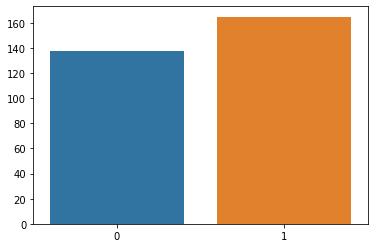

In [10]:
#Output balance

print(df['output'].value_counts())
x=df['output'].value_counts().index
y=df['output'].value_counts().values.tolist()
sns.barplot(x=x,y=y)

1    207
0     96
Name: sex, dtype: int64


<AxesSubplot:>

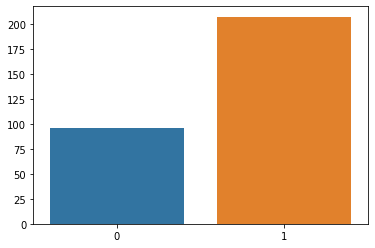

In [11]:
print(df['sex'].value_counts())
x=df['sex'].value_counts().index
y=df['sex'].value_counts().values.tolist()
sns.barplot(x=x,y=y)

### ProfileReport. Automated data analysis

In [12]:
pdp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

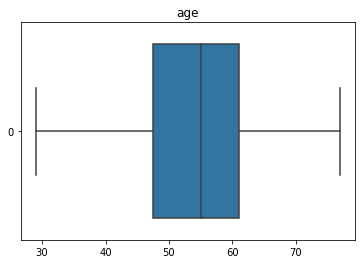

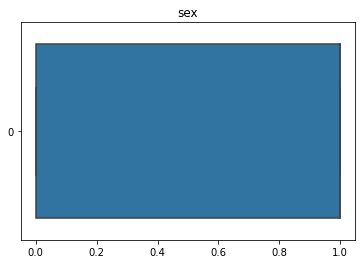

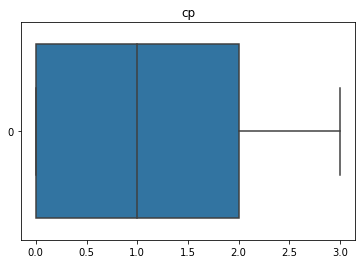

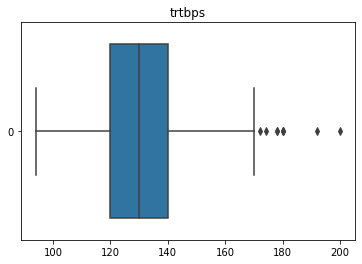

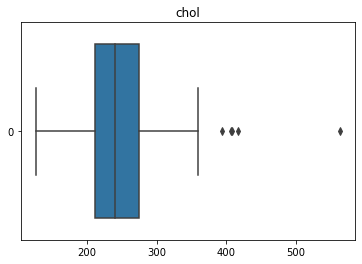

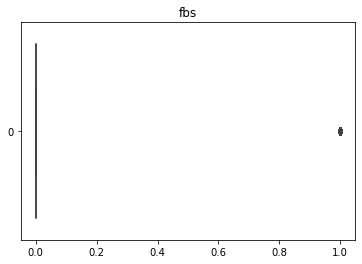

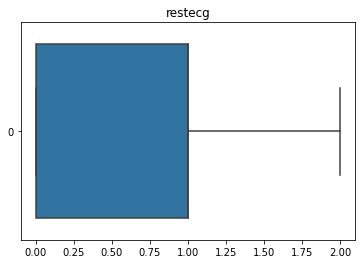

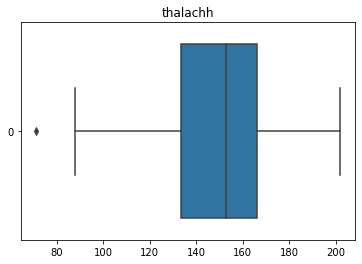

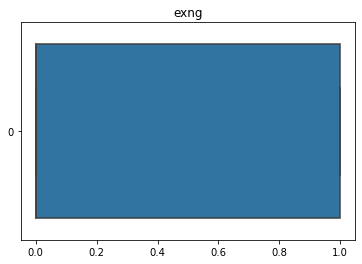

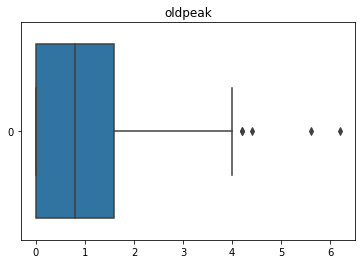

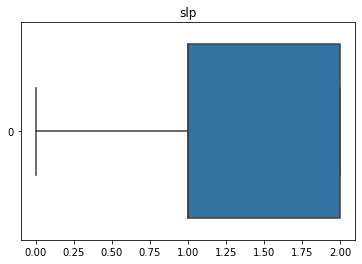

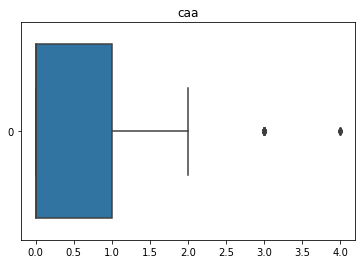

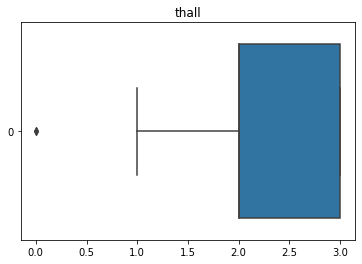

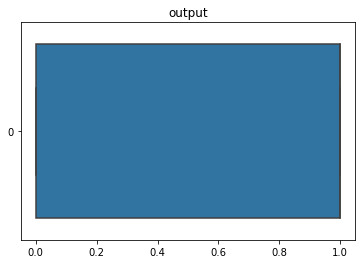

In [13]:
for i in list(df.columns):
    fig, ax = plt.subplots()
    plt.title(i)
    sns.boxplot(data = df[i], orient="h")

### EDA, continue. Bivariate analysis

<AxesSubplot:xlabel='cp'>

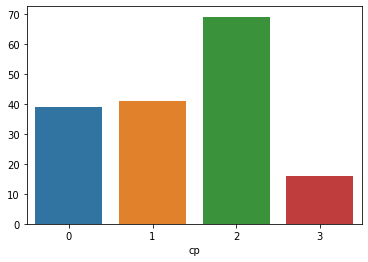

In [14]:
#cp related to output

x = df.groupby(['cp'])['output'].sum().index
y = df.groupby(['cp'])['output'].sum().values.tolist()
sns.barplot(x=x,y=y)

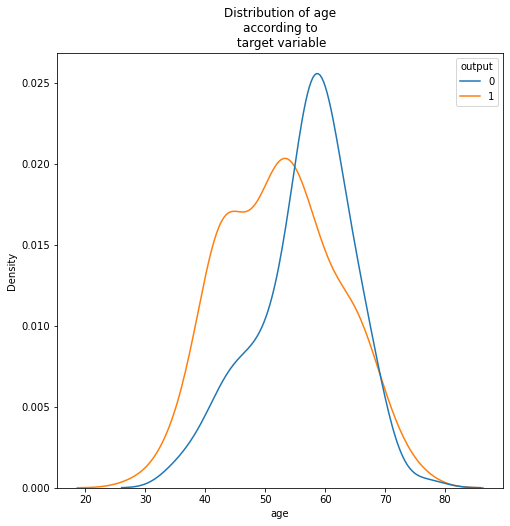

In [15]:
#age related to target

plt.figure(figsize=(8,8))
plt.title('Distribution of age\naccording to\n target variable')
sns.kdeplot(data=df,x='age',hue='output');

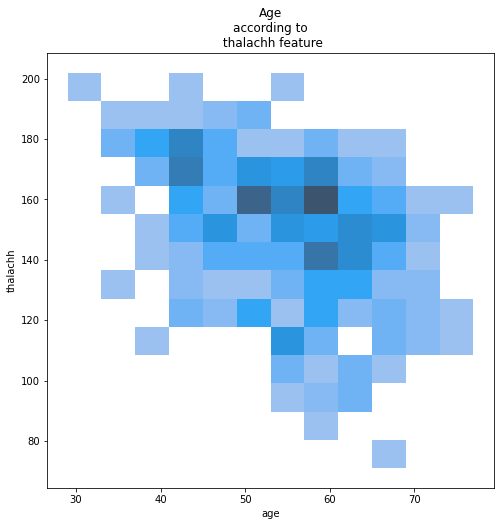

In [16]:
#age related to thalachh

plt.figure(figsize=(8,8))
plt.title('Age\naccording to\n thalachh feature')
sns.histplot(data=df,x='age',y='thalachh');

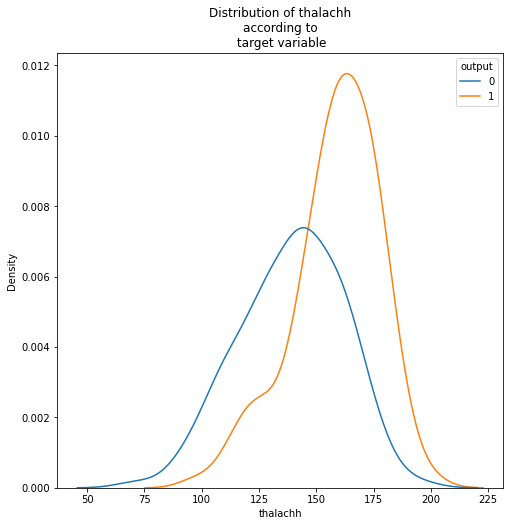

In [17]:
#thalachh related to target

plt.figure(figsize=(8,8))
plt.title('Distribution of thalachh\naccording to\n target variable')
sns.kdeplot(data=df,x='thalachh',hue='output');

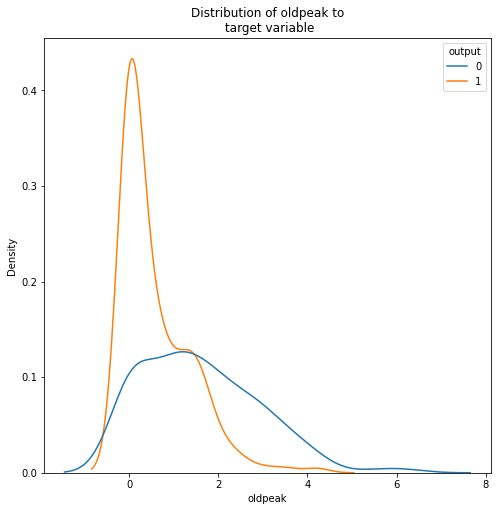

In [18]:
#oldpeak related to target

plt.figure(figsize=(8,8))
plt.title('Distribution of oldpeak to\n target variable')
sns.kdeplot(data=df,x='oldpeak',hue='output');

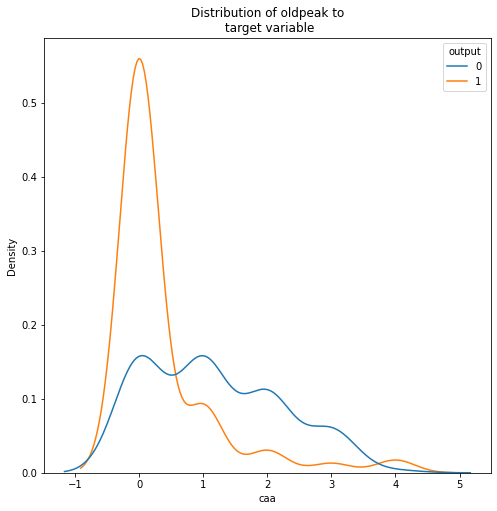

In [19]:
#caa related to target

plt.figure(figsize=(8,8))
plt.title('Distribution of oldpeak to\n target variable')
sns.kdeplot(data=df,x='caa',hue='output');

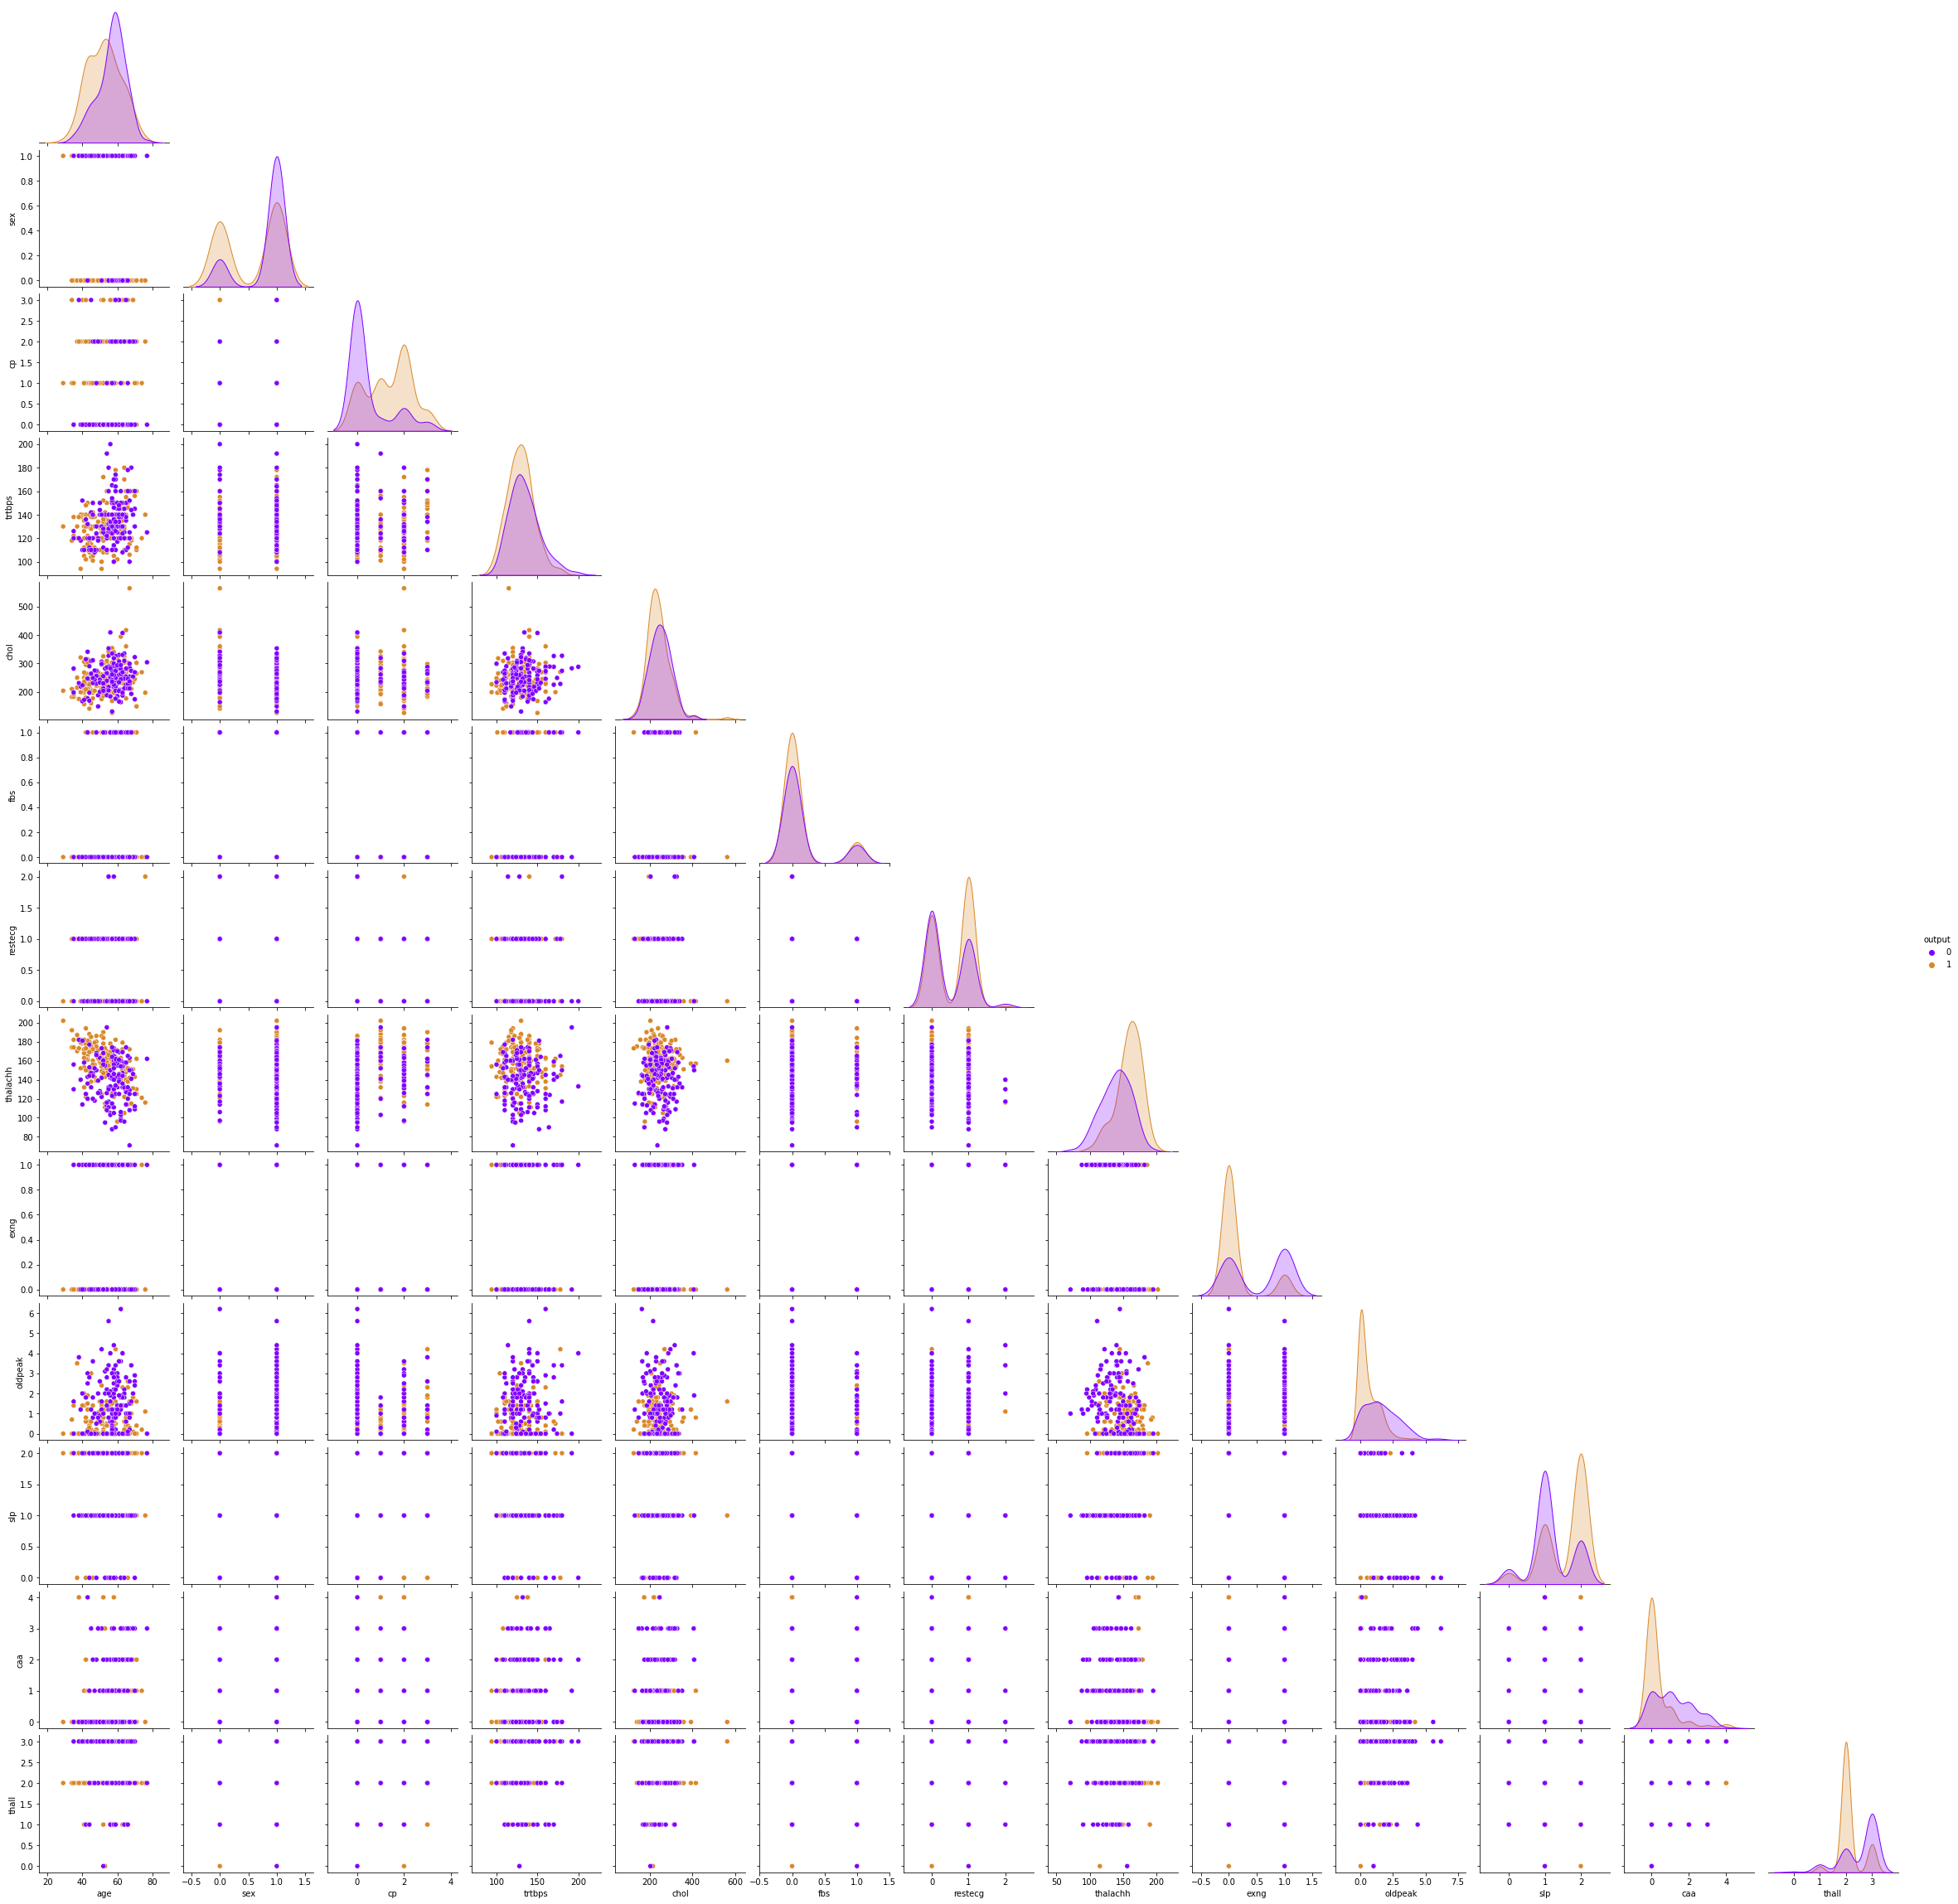

In [20]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"],corner=True)
plt.show()

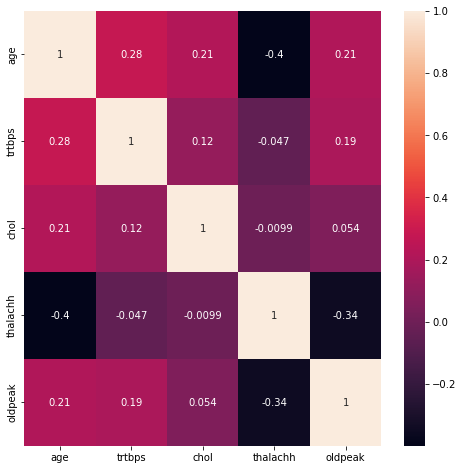

In [21]:
plt.figure(figsize=(8,8))
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,annot=True)
plt.show()

### EDA, conclusions

1. There is no missing data
2. There are outliers in continious features, though it doesn't seem strange to me
3. Data isn't balanced on '**age**' feature
4. I see a correlation between '**cp**' and '**output**'
5. Based on data, older **age** doesn't mean hightr risk, it seems strange
6. People with higher maximum heart rate achieved (**thalachh**) have higher chance of heart attack
7. People with non-anginal pain have higher chance of heart attack
8. People with less oldpeak achieved have higher chance of heart attack
9. People with **caa** major vessels = 0 have higher chance of heart attack
10. People with non-execise indused angina have higher chance of heart attack
11. People with **slp**, the slope of the peak exercise ST segment = downsloping have higher chance of heart attack
12. People with **thall** = 2 (normal) have higher chance of heart attack

## Data preprocessing

### Packages

In [1]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

print('Packages imported...')

Packages imported...
